In [236]:
import time
import numpy as np
np.seterr(all='warn')
import scipy.special as sp
import pandas as pd
import math
from decimal import Decimal, getcontext
import matplotlib.pyplot as plt

In [237]:
# Valor de Pi de referência
# Usaremos o valor de pi de math, que é float64, para a comparação de erro
PI_REF = math.pi

# A precisão do Decimal deve ser configurada para evitar erros de arredondamento
getcontext().prec = 50  # Definindo a precisão para 80 dígitos decimais

In [238]:
# Valor de Pi de referência com alta precisão
print(f"Valor de Pi de referência: {PI_REF:.20f}")

Valor de Pi de referência: 3.14159265358979311600


In [239]:
def erro_medio_quadratico(pi_a, tipagem):
    """
    Calcula o erro médio quadrático entre o valor de Pi calculado e o valor de Pi de referência..
    """
    pi_a = tipagem(pi_a)
    pi = tipagem(PI_REF)
    erro = abs(pi - pi_a)**2
    return erro

In [240]:
def leibniz_serie(n, tipagem):
    """
    Calcula Pi usando a série de Leibniz.
    """
    inicio = time.time()
    pi_a = tipagem(0.0)
    for k in range(n):
        termo = tipagem(1) / (tipagem(2 * k + 1))
        if k % 2 == 1:
            pi_a -= termo
        else:
            pi_a += termo
    pi_a *= tipagem(4)
    fim = time.time()
    erro = erro_medio_quadratico(pi_a, tipagem)
    return { "pi_a": pi_a, "tempo": fim - inicio, "erro": erro }

In [241]:
print("\n--- Série de Leibniz ---")
# Exemplo com float (32 bits)
leibniz_float = leibniz_serie(1000000, np.float32)
print("Leibniz (float, 1000000 termos): {:.15f}, Tempo: {:.6f} segundos, Erro: {:.10e}".format(
    leibniz_float["pi_a"], leibniz_float["tempo"], leibniz_float["erro"]))

# Exemplo com double (64 bits)
leibniz_double = leibniz_serie(1000000, np.float64)
print("Leibniz (double, 1000000 termos): {:.15f}, Tempo: {:.6f} segundos, Erro: {:.10e}".format(
    leibniz_double["pi_a"], leibniz_double["tempo"], leibniz_double["erro"]))

# Exemplo com Decimal (precisão fixa)
leibniz_decimal = leibniz_serie(1000000, Decimal)
print("Leibniz (Decimal, 1000000 termos): {:.15f}, Tempo: {:.6f} segundos, Erro: {:.10e}".format(
    leibniz_decimal["pi_a"], leibniz_decimal["tempo"], leibniz_decimal["erro"]))


--- Série de Leibniz ---
Leibniz (float, 1000000 termos): 3.141595363616943, Tempo: 2.270890 segundos, Erro: 6.8780536822e-12
Leibniz (double, 1000000 termos): 3.141591653589774, Tempo: 0.709367 segundos, Erro: 1.0000000376e-12
Leibniz (Decimal, 1000000 termos): 3.141591653589793, Tempo: 1.225115 segundos, Erro: 9.9999999975e-13


In [242]:
def nilakantha_serie(n, tipagem):
    """
    Calcula Pi usando a série de Nilakantha.
    """
    inicio = time.time()
    pi_a = tipagem()
    for k in range(1, n + 1):
        denominador = tipagem(2 * k) * tipagem(2 * k + 1) * tipagem(2 * k + 2)
        termo = tipagem(4) / denominador
        if k % 2 == 1:
            pi_a += termo
        else:
            pi_a -= termo
    pi_a += tipagem(3)
    fim = time.time()
    erro = erro_medio_quadratico(pi_a, tipagem)
    return { "pi_a": pi_a, "tempo": fim - inicio, "erro": erro }

In [243]:
print("\n--- Série de Nilakantha ---")
# Exemplo com float (32 bits)
nilakantha_float = nilakantha_serie(1000000, np.float32)
print("Nilakantha (float, 1000000 termos): {:.15f}, Tempo: {:.6f} segundos, Erro: {:.10e}".format(
    nilakantha_float["pi_a"], nilakantha_float["tempo"], nilakantha_float["erro"]))

# Exemplo com double (64 bits)
nilakantha_double = nilakantha_serie(1000000, np.float64)
print("Nilakantha (double, 1000000 termos): {:.15f}, Tempo: {:.6f} segundos, Erro: {:.10e}".format(
    nilakantha_double["pi_a"], nilakantha_double["tempo"], nilakantha_double["erro"]))

# Exemplo com Decimal (precisão fixa)
nilakantha_decimal = nilakantha_serie(1000000, Decimal)
print("Nilakantha (Decimal, 1000000 termos): {:.15f}, Tempo: {:.6f} segundos, Erro: {:.10e}".format(
    nilakantha_decimal["pi_a"], nilakantha_decimal["tempo"], nilakantha_decimal["erro"]))


--- Série de Nilakantha ---
Nilakantha (float, 1000000 termos): 3.141592741012573, Tempo: 4.644916 segundos, Erro: 0.0000000000e+00
Nilakantha (double, 1000000 termos): 3.141592653589791, Tempo: 1.389924 segundos, Erro: 3.1554436209e-30
Nilakantha (Decimal, 1000000 termos): 3.141592653589793, Tempo: 2.048595 segundos, Erro: 1.4936428170e-32


In [244]:
def arctan_taylor_serie(x, n, tipagem):
    """
    Calcula arctan(x) usando a série de Taylor.
    """
    resultado = tipagem(0.0)
    x_val = tipagem(x)
    for k in range(n):
        termo = (tipagem(-1)**k * x_val**(2 * k + 1)) / (tipagem(2 * k + 1))
        resultado += termo
    return resultado

def machin_formula(n, tipagem):
    """
    Calcula Pi usando a fórmula de Machin.
    """
    inicio = time.time()
    termo_1 = tipagem(4) * arctan_taylor_serie(tipagem(1)/tipagem(5), n, tipagem)
    termo_2 = arctan_taylor_serie(tipagem(1)/tipagem(239), n, tipagem)
    pi_a = tipagem(termo_1 - termo_2)
    pi_a *= tipagem(4)
    fim = time.time()
    erro = erro_medio_quadratico(pi_a, tipagem)
    return { "pi_a": pi_a, "tempo": fim - inicio, "erro": erro }

In [245]:
print("\n--- Formula de Machin ---")
# Exemplo com float (32 bits)
machin_float = machin_formula(1000000, np.float32)
print("Machin (float, 1000000 termos): {:.15f}, Tempo: {:.6f} segundos, Erro: {:.10e}".format(
    machin_float["pi_a"], machin_float["tempo"], machin_float["erro"]))

# Exemplo com double (64 bits)
machin_double = machin_formula(1000000, np.float64)
print("Machin (double, 1000000 termos): {:.15f}, Tempo: {:.6f} segundos, Erro: {:.10e}".format(
    machin_double["pi_a"], machin_double["tempo"], machin_double["erro"]))

# Exemplo com Decimal (precisão fixa)
machin_decimal = machin_formula(1000000, Decimal)
print("Machin (Decimal, 1000000 termos): {:.15f}, Tempo: {:.6f} segundos, Erro: {:.10e}".format(
    machin_decimal["pi_a"], machin_decimal["tempo"], machin_decimal["erro"]))


--- Formula de Machin ---


C:\Users\w504439\AppData\Local\Temp\ipykernel_18928\3116670914.py:8: RuntimeWarning: underflow encountered in scalar divide
  termo = (tipagem(-1)**k * x_val**(2 * k + 1)) / (tipagem(2 * k + 1))
C:\Users\w504439\AppData\Local\Temp\ipykernel_18928\3116670914.py:8: RuntimeWarning: underflow encountered in power
  termo = (tipagem(-1)**k * x_val**(2 * k + 1)) / (tipagem(2 * k + 1))


Machin (float, 1000000 termos): 3.141592741012573, Tempo: 22.313365 segundos, Erro: 0.0000000000e+00


C:\Users\w504439\AppData\Local\Temp\ipykernel_18928\3116670914.py:8: RuntimeWarning: underflow encountered in scalar power
  termo = (tipagem(-1)**k * x_val**(2 * k + 1)) / (tipagem(2 * k + 1))


Machin (double, 1000000 termos): 3.141592653589794, Tempo: 5.802436 segundos, Erro: 7.8886090522e-31
Machin (Decimal, 1000000 termos): 3.141592653589793, Tempo: 14.150701 segundos, Erro: 1.4997597827e-32


In [246]:
def euler_series(n, tipagem):
    """
    Calcula Pi usando a série de Euler.
    """
    inicio = time.time()
    resultado = tipagem(0.0)
    for k in range(1, n + 1):
        resultado += tipagem(1) / (tipagem(k)**2)
    pi_a = np.sqrt(tipagem(6) * resultado)
    fim = time.time()
    erro = erro_medio_quadratico(pi_a, tipagem)
    return { "pi_a": pi_a, "tempo": fim - inicio, "erro": erro }

In [247]:
print("\n--- Série de Euler ---")
# Exemplo com float (32 bits)
euler_float = euler_series(1000000, np.float32)
print("Euler (float, 1000000 termos): {:.15f}, Tempo: {:.6f} segundos, Erro: {:.10e}".format(
    euler_float["pi_a"], euler_float["tempo"], euler_float["erro"]))

# Exemplo com double (64 bits)
euler_double = euler_series(1000000, np.float64)
print("Euler (double, 1000000 termos): {:.15f}, Tempo: {:.6f} segundos, Erro: {:.10e}".format(
    euler_double["pi_a"], euler_double["tempo"], euler_double["erro"]))

# Exemplo com Decimal (precisão fixa)
euler_decimal = euler_series(1000000, Decimal)
print("Euler (Decimal, 1000000 termos): {:.15f}, Tempo: {:.6f} segundos, Erro: {:.10e}".format(
    euler_decimal["pi_a"], euler_decimal["tempo"], euler_decimal["erro"]))


--- Série de Euler ---
Euler (float, 1000000 termos): 3.141591698660509, Tempo: 4.169763 segundos, Erro: 9.0949470177e-13
Euler (double, 1000000 termos): 3.141591698660509, Tempo: 0.377375 segundos, Erro: 9.1188993846e-13
Euler (Decimal, 1000000 termos): 3.141591698660467, Tempo: 1.038231 segundos, Erro: 9.1189001784e-13


In [248]:
def ramanujan_formula(n, tipagem):
    """
    Calcula Pi usando a fórmula de Ramanujan.
    
    Para esta fórmula, o cálculo de fatoriais e potências
    pode rapidamente exceder a capacidade dos tipos float ou double para valores grandes de k.
    No entanto, como a série converge extremamente rápido, geralmente apenas um ou dois termos 
    são suficientes para atingir a precisão máxima do double. 
    
    Para muitos termos, seria necessária uma biblioteca de aritmética de precisão arbitrária (como mpmath)
    """
    inicio = time.time()
    soma = tipagem(0.0)
    constant = tipagem(2 * np.sqrt(2)) / tipagem(9801)
    for k in range(n):
        numerador = tipagem(math.factorial(4 * k)) * tipagem(1103 + 26390 * k)
        denominador = (tipagem(math.factorial(k))**4) * (tipagem(396)**(4 * k))
        termo = numerador / denominador
        soma += termo
    pi_a = tipagem(1) / (constant * soma)
    fim = time.time()
    erro = erro_medio_quadratico(pi_a, tipagem)
    return { "pi_a": pi_a, "tempo": fim - inicio, "erro": erro }

In [249]:
print("\n--- Fórmula de Ramanujan ---")
# Exemplo com float (32 bits)
ramanujan_float = ramanujan_formula(2, np.float32)  # Usando apenas 2 termos para evitar overflow
print("Ramanujan (float, 2 termos): {:.15f}, Tempo: {:.6f} segundos, Erro: {:.10e}".format(
    ramanujan_float["pi_a"], ramanujan_float["tempo"], ramanujan_float["erro"]))

# Exemplo com double (64 bits)
ramanujan_double = ramanujan_formula(2, np.float64)  # Usando apenas 2 termos para evitar overflow
print("Ramanujan (double, 2 termos): {:.15f}, Tempo: {:.6f} segundos, Erro: {:.10e}".format(
    ramanujan_double["pi_a"], ramanujan_double["tempo"], ramanujan_double["erro"]))

# Exemplo com Decimal (precisão fixa)
ramanujan_decimal = ramanujan_formula(2, Decimal)
print("Ramanujan (Decimal, 2 termos): {:.15f}, Tempo: {:.6f} segundos, Erro: {:.10e}".format(
    ramanujan_decimal["pi_a"], ramanujan_decimal["tempo"], ramanujan_decimal["erro"]))


--- Fórmula de Ramanujan ---
Ramanujan (float, 2 termos): 3.141592817652961, Tempo: 0.000000 segundos, Erro: 0.0000000000e+00
Ramanujan (double, 2 termos): 3.141592653589794, Tempo: 0.000000 segundos, Erro: 1.9721522631e-31
Ramanujan (Decimal, 2 termos): 3.141592653589794, Tempo: 0.000000 segundos, Erro: 2.9948002300e-31


In [250]:
def chudnovsky_algoritmo(n, tipagem=np.float64):
    """
    Calcula Pi usando o algoritmo de Chudnovsky.

    Assim como a fórmula de Ramanujan, esta série converge extremamente rápido.
    Para float e double, um ou dois termos já serão suficientes para atingir a precisão máxima da máquina. 
    Cálculos para muitos termos requerem mpmath.
    """
    inicio = time.time()
    soma = tipagem(0.0)
    C = tipagem(426880 * np.sqrt(10005))
    K = tipagem(640320)
    for k in range(n):
        numerador = (tipagem(-1)**k) * tipagem(math.factorial(6 * k)) * tipagem(13591409 + 545140134 * k)
        denominador = tipagem(math.factorial(3 * k)) * (tipagem(math.factorial(k))**3) * (K**(tipagem(3 * k + 1.5)))
        term = numerador / denominador
        soma += term
    pi_a = C / soma
    fim = time.time()
    erro = erro_medio_quadratico(pi_a, tipagem)
    return { "pi_a": pi_a, "tempo": fim - inicio, "erro": erro }

In [251]:
print("\n--- Algoritmo de Chudnovsky ---")
# Exemplo com float (32 bits)
chudnovsky_float = chudnovsky_algoritmo(2, np.float32)
print("Chudnovsky (float, 1000 termos): {:.15f}, Tempo: {:.6f} segundos, Erro: {:.10e}".format(
    chudnovsky_float["pi_a"], chudnovsky_float["tempo"], chudnovsky_float["erro"]))

# Exemplo com double (64 bits)
chudnovsky_double = chudnovsky_algoritmo(2, np.float64)
print("Chudnovsky (double, 1000 termos): {:.15f}, Tempo: {:.6f} segundos, Erro: {:.10e}".format(
    chudnovsky_double["pi_a"], chudnovsky_double["tempo"], chudnovsky_double["erro"]))

# Exemplo com Decimal (precisão fixa)
chudnovsky_decimal = chudnovsky_algoritmo(2, Decimal)
print("Chudnovsky (Decimal, 1000 termos): {:.15f}, Tempo: {:.6f} segundos, Erro: {:.10e}".format(
    chudnovsky_decimal["pi_a"], chudnovsky_decimal["tempo"], chudnovsky_decimal["erro"]))


--- Algoritmo de Chudnovsky ---
Chudnovsky (float, 1000 termos): 1609701961.025962591171265, Tempo: 0.000000 segundos, Erro: 2.5911405803e+18
Chudnovsky (double, 1000 termos): 1609701961.000835895538330, Tempo: 0.000000 segundos, Erro: 2.5911403931e+18
Chudnovsky (Decimal, 1000 termos): 1609701961.000835841967851, Tempo: 0.000000 segundos, Erro: 2.5911403931e+18


In [252]:
def bbp_formula(n, tipagem=np.float64):
    """
    Calcula Pi usando a fórmula BBP.
    """
    inicio = time.time()
    pi_a = tipagem(0.0)
    for k in range(n):
        termo_1 = tipagem(4) / (tipagem(8 * k + 1))
        termo_2 = tipagem(2) / (tipagem(8 * k + 4))
        termo_3 = tipagem(1) / (tipagem(8 * k + 5))
        termo_4 = tipagem(1) / (tipagem(8 * k + 6))
        soma = termo_1 - termo_2 - termo_3 - termo_4
    
        pi_a += (tipagem(1) / (tipagem(16)**k)) * soma
    fim = time.time()
    erro = erro_medio_quadratico(pi_a, tipagem)
    return { "pi_a": pi_a, "tempo": fim - inicio, "erro": erro }

In [253]:
print("\n--- Fórmula de Bailey–Borwein–Plouffe (BBP) ---")
# Exemplo com float (32 bits)
bbp_float = bbp_formula(1000000, np.float32)
print("BBP (float, 1000000 termos): {:.15f}, Tempo: {:.6f} segundos, Erro: {:.10e}".format(
    bbp_float["pi_a"], bbp_float["tempo"], bbp_float["erro"]))

# Exemplo com double (64 bits)
bbp_double = bbp_formula(1000000, np.float64)
print("BBP (double, 1000000 termos): {:.15f}, Tempo: {:.6f} segundos, Erro: {:.10e}".format(
    bbp_double["pi_a"], bbp_double["tempo"], bbp_double["erro"]))

# Exemplo com Decimal (precisão fixa)
# bbp_decimal = bbp_formula(1000000, Decimal)
# print("BBP (Decimal, 1000000 termos): {:.15f}, Tempo: {:.6f} segundos, Erro: {:.10e}".format(
#     bbp_decimal["pi_a"], bbp_decimal["tempo"], bbp_decimal["erro"]))
# Para o BBP, o Decimal não funciona, resultando em uma exceção de overflow


--- Fórmula de Bailey–Borwein–Plouffe (BBP) ---


C:\Users\w504439\AppData\Local\Temp\ipykernel_18928\2756532151.py:14: RuntimeWarning: overflow encountered in power
  pi_a += (tipagem(1) / (tipagem(16)**k)) * soma


BBP (float, 1000000 termos): 3.141592527786077, Tempo: 10.288528 segundos, Erro: 5.6843418861e-14


C:\Users\w504439\AppData\Local\Temp\ipykernel_18928\2756532151.py:14: RuntimeWarning: underflow encountered in scalar multiply
  pi_a += (tipagem(1) / (tipagem(16)**k)) * soma
C:\Users\w504439\AppData\Local\Temp\ipykernel_18928\2756532151.py:14: RuntimeWarning: overflow encountered in scalar power
  pi_a += (tipagem(1) / (tipagem(16)**k)) * soma


BBP (double, 1000000 termos): 3.141592653589793, Tempo: 3.149740 segundos, Erro: 0.0000000000e+00


In [254]:
# --- Coleta de Dados para Comparação ---
metodos = {
    "Leibniz": leibniz_serie,
    "Nilakantha": nilakantha_serie,
    "Machin": machin_formula,
    "Euler": euler_series,
    "Ramanujan": ramanujan_formula,
    "Chudnovsky": chudnovsky_algoritmo,
    "BBP": bbp_formula
}

# Termos a serem testados para convergência (alguns métodos precisam de muitos, outros poucos)
termos_series_lentas = [1000, 10000, 100000, 1000000]
termos_series_rapidas = [1, 2, 3, 5, 10, 15]

tipagem = {
    "float": np.float32,
    "double": np.float64
}

resultado_convergencia = {tipo: [] for tipo in tipagem}
resultado_tempo = {tipo: [] for tipo in tipagem}

# Coletar dados de precisão e convergência
for nome_tipo, funcao_tipo in tipagem.items():
    for nome_metodo, funcao_metodo in metodos.items():
        print(f"\nCalculando para {nome_metodo} com {nome_tipo}...")
        
        termos = termos_series_lentas
        # Se o método for Machin, Ramanujan, Chudnovsky ou BBP, use termos rápidos
        if nome_metodo in ["Machin", "Ramanujan", "Chudnovsky", "BBP"]:
            termos = termos_series_rapidas
        
        for n_termos in termos:
            resultado = funcao_metodo(n_termos, funcao_tipo)            
            resultado_convergencia[nome_tipo].append({
                "Metodo": nome_metodo,
                "Termos": n_termos,
                "PI_Aproximado": resultado["pi_a"],
                "Erro_Medio_Quadratico": resultado["erro"],
                "Tipo_da_Variavel": nome_tipo
            })
            
            # Store time results only once per method/precision for a representative run
            # We'll collect timing data for specific, more realistic term counts for each method
            if n_termos == termos[-1]: # Use the largest number of terms for time comparison for now
                resultado_tempo[nome_tipo].append({
                    "Metodo": nome_metodo,
                    "Termos": n_termos,
                    "Tempo_Segundos": resultado["tempo"],
                    "Tipo_da_Variavel": nome_tipo
                })

# Criar DataFrames
df_convergencia_float = pd.DataFrame(resultado_convergencia["float"])
df_convergencia_double = pd.DataFrame(resultado_convergencia["double"])
df_tempo_float = pd.DataFrame(resultado_tempo["float"])
df_tempo_double = pd.DataFrame(resultado_tempo["double"])


Calculando para Leibniz com float...

Calculando para Nilakantha com float...

Calculando para Machin com float...

Calculando para Euler com float...

Calculando para Ramanujan com float...

Calculando para Chudnovsky com float...

Calculando para BBP com float...

Calculando para Leibniz com double...


C:\Users\w504439\AppData\Local\Temp\ipykernel_18928\4090990870.py:16: RuntimeWarning: overflow encountered in scalar multiply
  numerador = tipagem(math.factorial(4 * k)) * tipagem(1103 + 26390 * k)
C:\Users\w504439\AppData\Local\Temp\ipykernel_18928\4090990870.py:16: RuntimeWarning: overflow encountered in cast
  numerador = tipagem(math.factorial(4 * k)) * tipagem(1103 + 26390 * k)
C:\Users\w504439\AppData\Local\Temp\ipykernel_18928\2997573406.py:15: RuntimeWarning: overflow encountered in scalar power
  denominador = tipagem(math.factorial(3 * k)) * (tipagem(math.factorial(k))**3) * (K**(tipagem(3 * k + 1.5)))
C:\Users\w504439\AppData\Local\Temp\ipykernel_18928\2997573406.py:14: RuntimeWarning: overflow encountered in cast
  numerador = (tipagem(-1)**k) * tipagem(math.factorial(6 * k)) * tipagem(13591409 + 545140134 * k)
C:\Users\w504439\AppData\Local\Temp\ipykernel_18928\2997573406.py:16: RuntimeWarning: invalid value encountered in scalar divide
  term = numerador / denominador
C:


Calculando para Nilakantha com double...

Calculando para Machin com double...

Calculando para Euler com double...

Calculando para Ramanujan com double...

Calculando para Chudnovsky com double...

Calculando para BBP com double...


C:\Users\w504439\AppData\Local\Temp\ipykernel_18928\2997573406.py:15: RuntimeWarning: overflow encountered in scalar multiply
  denominador = tipagem(math.factorial(3 * k)) * (tipagem(math.factorial(k))**3) * (K**(tipagem(3 * k + 1.5)))


In [ ]:
print("\n## Tabelas Comparativas")
print("\n### Precisão e Convergência (float32)")
print(df_convergencia_float.to_markdown(index=False, floatfmt=".10f"))

print("\n### Precisão e Convergência (double)")
print(df_convergencia_double.to_markdown(index=False, floatfmt=".15f"))

print("\n### Tempo de Execução (double)")
print(df_tempo_float.to_markdown(index=False, floatfmt=".8f"))

print("\n### Tempo de Execução (double)")
print(df_tempo_double.to_markdown(index=False, floatfmt=".8f"))


## Tabelas Comparativas

### Precisão e Convergência (float32)
| Metodo     |   Termos |         PI_Aproximado |          Erro_Medio_Quadratico | Tipo_da_Variavel   |
|:-----------|---------:|----------------------:|-------------------------------:|:-------------------|
| Leibniz    |     1000 |          3.1405925751 |                   0.0000010003 | float              |
| Leibniz    |    10000 |          3.1414985657 |                   0.0000000089 | float              |
| Leibniz    |   100000 |          3.1415858269 |                   0.0000000000 | float              |
| Leibniz    |  1000000 |          3.1415953636 |                   0.0000000000 | float              |
| Nilakantha |     1000 |          3.1415927410 |                   0.0000000000 | float              |
| Nilakantha |    10000 |          3.1415927410 |                   0.0000000000 | float              |
| Nilakantha |   100000 |          3.1415927410 |                   0.0000000000 | float              |


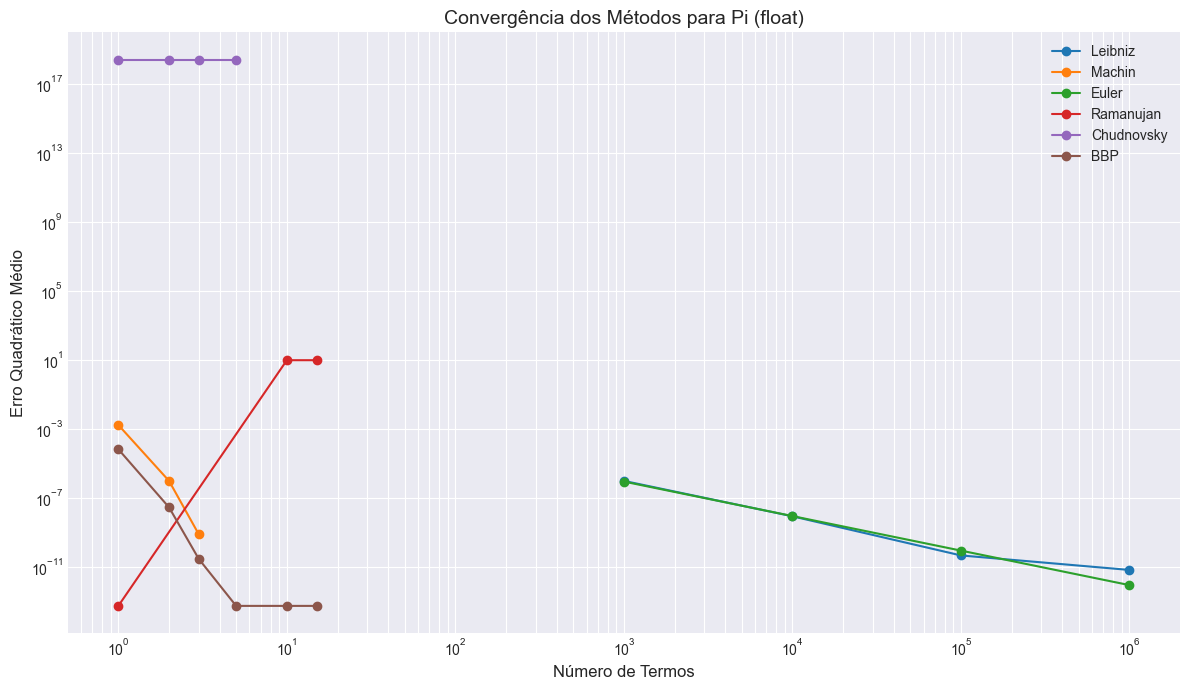

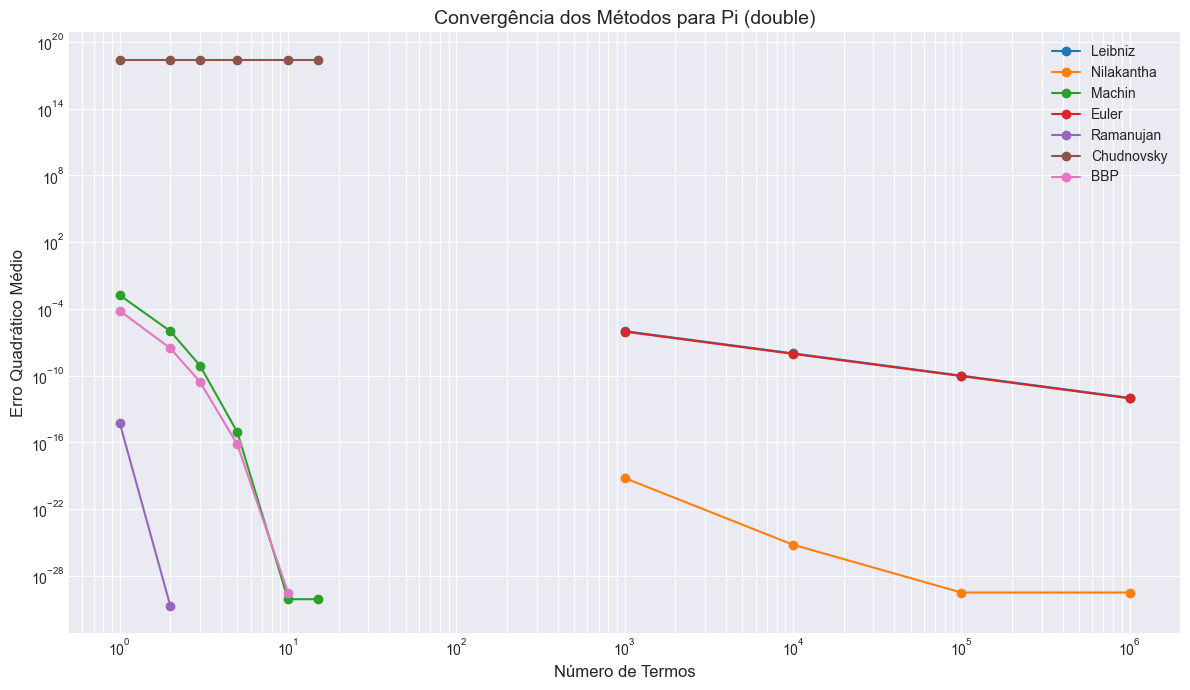

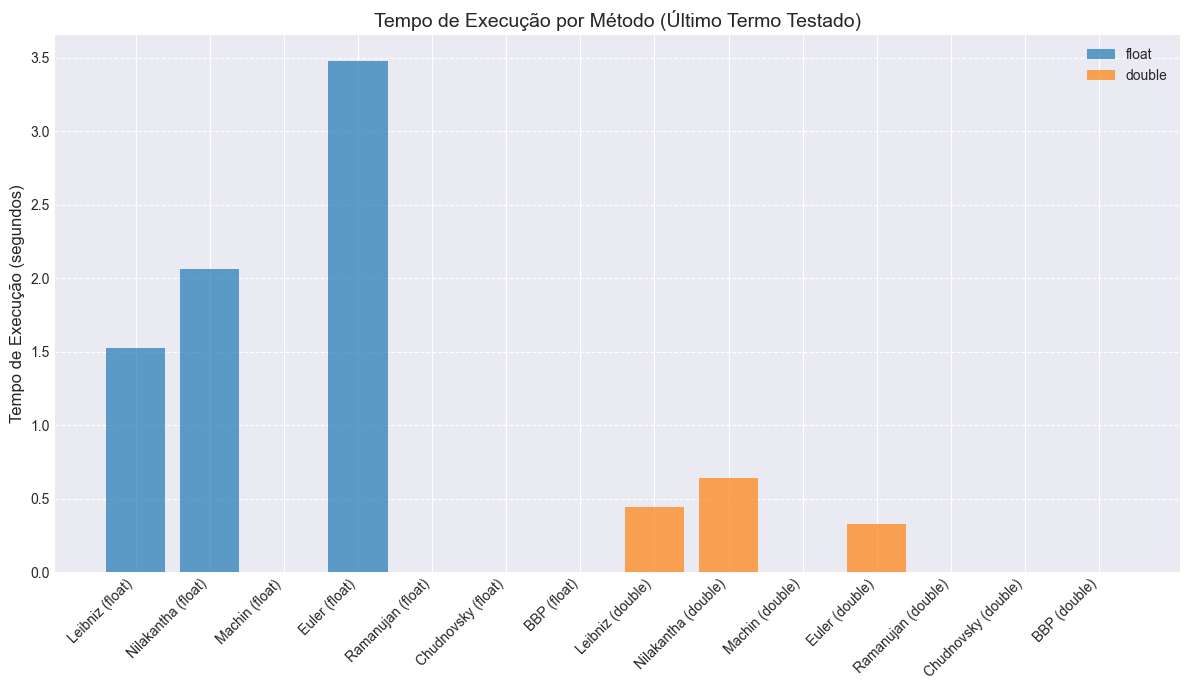

In [256]:
# Configurações de plotagem
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams.update({'font.size': 10, 'axes.labelsize': 12, 'axes.titlesize': 14, 'xtick.labelsize': 10, 'ytick.labelsize': 10, 'legend.fontsize': 10})

# Gráfico de Convergência (Log-Log Plot) para float32
plt.figure(figsize=(12, 7))
for nome_metodo in metodos:
    # Filter for methods that actually converge over the chosen range of terms for plotting
    plot_df = df_convergencia_float[(df_convergencia_float["Metodo"] == nome_metodo) & (df_convergencia_float["Erro_Medio_Quadratico"] > 0)]
    if not plot_df.empty:
        plt.loglog(plot_df["Termos"], plot_df["Erro_Medio_Quadratico"], marker='o', linestyle='-', label=nome_metodo)
plt.xlabel("Número de Termos")
plt.ylabel("Erro Quadrático Médio")
plt.title("Convergência dos Métodos para Pi (float)")
plt.legend()
plt.grid(True, which="both", ls="-")
plt.tight_layout()
plt.show()

# Gráfico de Convergência (Log-Log Plot) para float64
plt.figure(figsize=(12, 7))
for nome_metodo in metodos:
    plot_df = df_convergencia_double[(df_convergencia_double["Metodo"] == nome_metodo) & (df_convergencia_double["Erro_Medio_Quadratico"] > 0)]
    if not plot_df.empty:
        plt.loglog(plot_df["Termos"], plot_df["Erro_Medio_Quadratico"], marker='o', linestyle='-', label=nome_metodo)
plt.xlabel("Número de Termos")
plt.ylabel("Erro Quadrático Médio")
plt.title("Convergência dos Métodos para Pi (double)")
plt.legend()
plt.grid(True, which="both", ls="-")
plt.tight_layout()
plt.show()

# Gráfico de Tempo de Execução
plt.figure(figsize=(12, 7))
# Consideramos os últimos termos testados para cada método como representativos para tempo
# Poderíamos expandir isso para plotar tempo vs. termos, mas para uma visão geral, o último termo é suficiente.
for tipo, df_t in {"float": df_tempo_float, "double": df_tempo_double}.items():
    plt.bar(df_t["Metodo"] + f" ({tipo})", df_t["Tempo_Segundos"], label=tipo, alpha=0.7)

plt.ylabel("Tempo de Execução (segundos)")
plt.title("Tempo de Execução por Método (Último Termo Testado)")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()